# Analysis for the Modeling Game

In [1]:
%matplotlib inline
import lmfit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint

import tellurium as te
import gene_network as gn
import modeling_game as mg
import model_fitting as mf
import gene_analyzer as ga
import util

## Analysis Codes

In [2]:
def evaluate(desc_stgs, **kwargs):
    analyzer = ga.GeneAnalyzer()
    for desc_stg in desc_stgs:
        analyzer.do(desc_stg, **kwargs)
        title = "%s: Rsq = %d%%" % (desc_stg, int(100*np.round(analyzer.rsq, 3)))
        plt.figure()
        analyzer.plot(title=title)
    return analyzer

## Explorations of Gene Structures

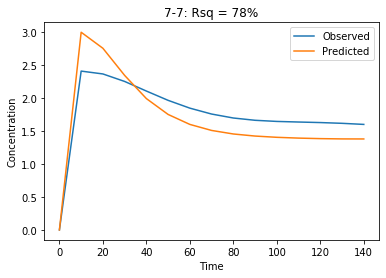

In [3]:
evaluate(["7-7"], max_iteration=20, end_time=150)

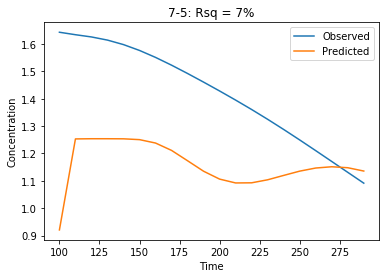

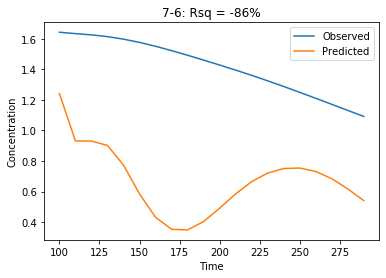

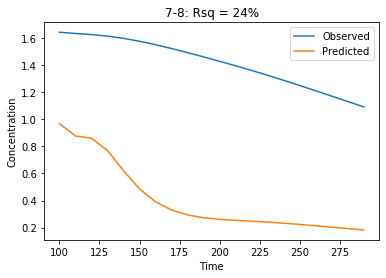

In [4]:
analyzer = evaluate(["7-5", "7-6", "7-8"], max_iteration=20, start_time=100, end_time=300)

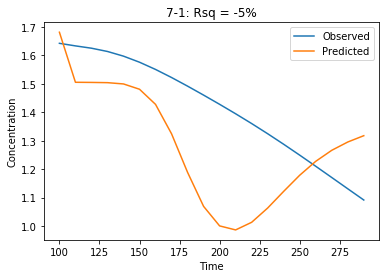

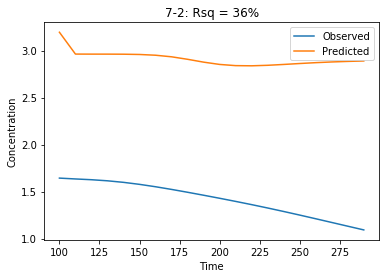

In [5]:
analyzer = evaluate(["7-1", "7-2"], max_iteration=20, start_time=100, end_time=300)

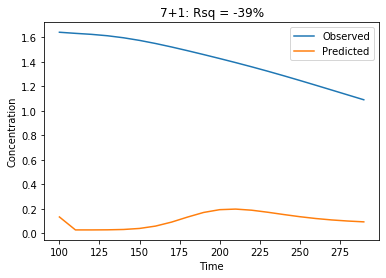

In [6]:
analyzer = evaluate(["7+1"], max_iteration=100, start_time=100, end_time=300)

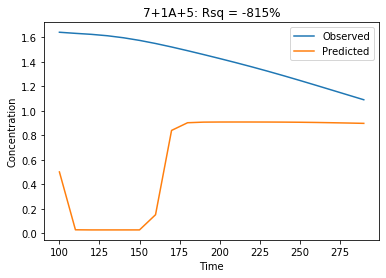

In [7]:
analyzer = evaluate(["7+1A+5"], max_iteration=20, start_time=100, end_time=300)

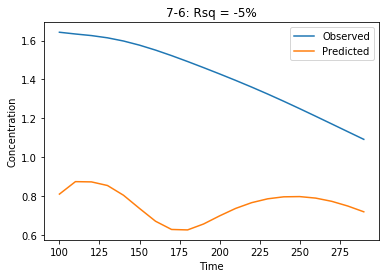

In [8]:
analyzer = evaluate(["7-6"], max_iteration=100, start_time=100, end_time=300)

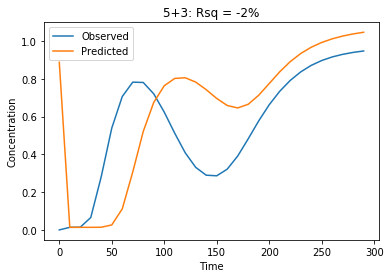

In [9]:
analyzer = evaluate(["5+3"], max_iteration=20, start_time=0, end_time=300)

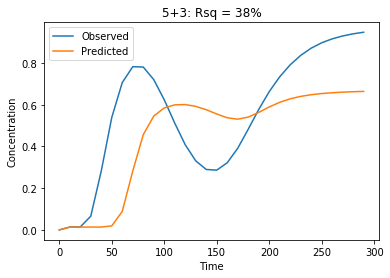

In [10]:
analyzer = evaluate(["5+3"], max_iteration=50, start_time=0, end_time=300)

In [11]:
analyzer = evaluate(["7-7A-2"], max_iteration=200, start_time=0, end_time=1200)

KeyboardInterrupt: 

In [ ]:
mg.plotData(analyzer._df_mrna, start_time=0, end_time=300)

In [ ]:

ser_y = analyzer._df_mrna.loc[analyzer.times_est, "mRNA7"]
ser_res = ser_y - analyzer.arr_est
ser_res.var() / ser_y.var()

In [ ]:
STOP
evaluate(["7-7A-2", "7-7A-4", "7-7A-3", "7-7A-5", "7-7A-6", "7-7A-8"], max_iteration=100)
evaluate(["7-2", "7-4", "7-3", "7-5", "7-6", "7-8"], max_iteration=100)

In [ ]:
STOP
import cProfile
analyzer = ga.GeneAnalyzer()
cProfile.run('analyzer.do("7-7", end_time=100)')

## Correlation Analysis
The goal here is to gain intuition about possible TF configurations for genes.

1. Construct cross correlatons between mRNA and proteins at different time lags. Plt as heatmap.